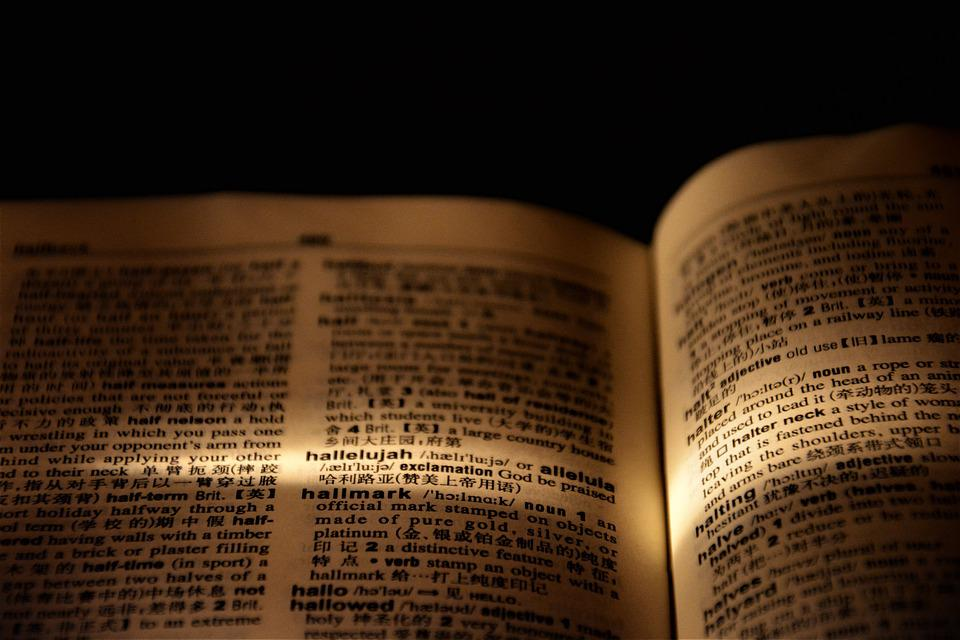

In [1]:
# Packages
import pandas as pd
import numpy as np

imdb_data = pd.read_table('C:/Users/Ntando/Downloads/sentiment labelled sentences/imdb_labelled.txt', names= ['sentence', 'sentiment'])

In [2]:
# a quick view of the first 5 rows
imdb_data.head()

,sentence,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
# we get the dimension of the dataset
imdb_data.shape


(748, 2)

In [4]:
# function to get word length per row
def word_count(string):
    # get the word split
    word = string.split()

    # get the length
    length = len(word)
    # return length of word
    return length

imdb_data['word_len'] = imdb_data['sentence'].apply(word_count)
imdb_data.head() 

,sentence,sentiment,word_len
0,"A very, very, very slow-moving, aimless movie ...",0,13
1,Not sure who was more lost - the flat characte...,0,19
2,Attempting artiness with black & white and cle...,0,31
3,Very little music or anything to speak of.,0,8
4,The best scene in the movie was when Gerardo i...,1,21


In [5]:
# Number of characters feature
imdb_data['num_characters'] = imdb_data['sentence'].apply(len)
imdb_data.head() 

,sentence,sentiment,word_len,num_characters
0,"A very, very, very slow-moving, aimless movie ...",0,13,87
1,Not sure who was more lost - the flat characte...,0,19,99
2,Attempting artiness with black & white and cle...,0,31,188
3,Very little music or anything to speak of.,0,8,44
4,The best scene in the movie was when Gerardo i...,1,21,108


In [6]:
# function to get the average word length
def avg_word_length(string):
    # get word lengths
    words = string.split()
    words_lengths = [len(word) for word in words]

    # get the average
    avg_word_length = sum(words_lengths)/len(words)
    return avg_word_length

imdb_data['avg_characters'] = imdb_data['sentence'].apply(avg_word_length)
imdb_data.head() 

,sentence,sentiment,word_len,num_characters,avg_characters
0,"A very, very, very slow-moving, aimless movie ...",0,13,87,5.615385
1,Not sure who was more lost - the flat characte...,0,19,99,4.157895
2,Attempting artiness with black & white and cle...,0,31,188,5.032258
3,Very little music or anything to speak of.,0,8,44,4.375000
4,The best scene in the movie was when Gerardo i...,1,21,108,4.095238


In [7]:
# function to get the number of sentences
from nltk.tokenize import sent_tokenize, word_tokenize

def num_sentences(string):
    # make sentences
    sentences = sent_tokenize(string)
    length = len(sentences)
    return length


imdb_data['num_sentence'] = imdb_data['sentence'].apply(num_sentences)
imdb_data.head()

,sentence,sentiment,word_len,num_characters,avg_characters,num_sentence
0,"A very, very, very slow-moving, aimless movie ...",0,13,87,5.615385,1
1,Not sure who was more lost - the flat characte...,0,19,99,4.157895,1
2,Attempting artiness with black & white and cle...,0,31,188,5.032258,1
3,Very little music or anything to speak of.,0,8,44,4.375000,1
4,The best scene in the movie was when Gerardo i...,1,21,108,4.095238,1


In [8]:
import re

# function to get number of words stating with capital letters
def capital_letters(string):
    # the capital words
    capital_word = r"[A-Z]"
    capital_words = re.findall(capital_word, string)
    number_words = len(capital_words)
    return number_words

imdb_data['num_capital_letters'] = imdb_data['sentence'].apply(capital_letters)
imdb_data.head()

,sentence,sentiment,word_len,num_characters,avg_characters,num_sentence,num_capital_letters
0,"A very, very, very slow-moving, aimless movie ...",0,13,87,5.615385,1,1
1,Not sure who was more lost - the flat characte...,0,19,99,4.157895,1,1
2,Attempting artiness with black & white and cle...,0,31,188,5.032258,1,1
3,Very little music or anything to speak of.,0,8,44,4.375000,1,1
4,The best scene in the movie was when Gerardo i...,1,21,108,4.095238,1,2


In [9]:
# function of getting number of digits
def digits(string):
    digits_sent = r"[0-9]"
    digits_ = re.findall(digits_sent, string)
    digits = len(digits_)
    return digits

imdb_data['num_digits'] = imdb_data['sentence'].apply(digits)
imdb_data.head()

,sentence,sentiment,word_len,num_characters,avg_characters,num_sentence,num_capital_letters,num_digits
0,"A very, very, very slow-moving, aimless movie ...",0,13,87,5.615385,1,1,0
1,Not sure who was more lost - the flat characte...,0,19,99,4.157895,1,1,0
2,Attempting artiness with black & white and cle...,0,31,188,5.032258,1,1,0
3,Very little music or anything to speak of.,0,8,44,4.375000,1,1,0
4,The best scene in the movie was when Gerardo i...,1,21,108,4.095238,1,2,0


In [10]:
# Which sentiments have more than 10 digits within it?
imdb_data[imdb_data['num_digits'] > 10].head(5)


,sentence,sentiment,word_len,num_characters,avg_characters,num_sentence,num_capital_letters,num_digits
19,The structure of this film is easily the most...,0,865,4778,4.380347,63,120,68
135,You'll love it! \t1\nThis movie is BAD. \t0\...,1,199,1053,4.135678,16,38,15
136,"In fact, it's hard to remember that the part ...",0,1390,7944,4.574101,100,206,109
149,"I love it. \t1\nThe ending is so, SO perfect...",0,302,1562,3.996689,25,44,30
646,"With great sound effects, and impressive spec...",1,797,4487,4.491844,55,129,66


In [11]:
# We examine the 136th row
imdb_data.iloc[136, 0]

' In fact, it\'s hard to remember that the part of Ray Charles is being acted, and not played by the man himself.  \t1\nRay Charles is legendary.  \t1\nRay Charles\' life provided excellent biographical material for the film, which goes well beyond being just another movie about a musician.  \t1\nHitchcock is a great director.  \t1\nIronically I mostly find his films a total waste of time to watch.  \t0\nSecondly, Hitchcock pretty much perfected the thriller and chase movie.  \t1\nIt\'s this pandering to the audience that sabotages most of his films.  \t0\nHence the whole story lacks a certain energy.  \t0\nThe plot simply rumbles on like a machine, desperately depending on the addition of new scenes.  \t0\nThere are the usual Hitchcock logic flaws.  \t0\nMishima is extremely uninteresting.  \t0\nThis is a chilly, unremarkable movie about an author living/working in a chilly abstruse culture.  \t0\nThe flat reenactments don\'t hold your attention because they are emotionally adrift and